In [36]:
# import tensorflow, keras and pandas
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
#from tensorflow.contrib import lite

In [2]:
# read data file
# shuffle the rows since we had removed some columns and rows
# to achieve better accuracy 
data = pd.read_csv('dataset.csv', na_values=['.'])
data = data.sample(frac=1)
print(data.describe)

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
80    41    1   2       112   250    0        1      179      0      0.0   
215   43    0   0       132   341    1        0      136      1      3.0   
145   70    1   1       156   245    0        0      143      0      0.0   
270   46    1   0       120   249    0        0      144      0      0.8   
92    52    1   2       138   223    0        1      169      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
200   44    1   0       110   197    0        0      177      0      0.0   
41    48    1   1       130   245    0        0      180      0      0.2   
173   58    1   2       132   224    0        0      173      0      3.2   
43    53    0   0       130   264    0        0      143      0      0.4   
97    52    1   0       108   233    1        1      147      0      0.1   

     slope  ca  thal  target  
80       2   0     2  

In [4]:
# separate the output data (column 'num') from rest of the data
values_series = data['target']
x_data = data.pop('target')

# split input(x) and output (y) data 
# for training and testing
train_x_data = data[0:100]
train_y_data = x_data[0:100]
train_x_data = train_x_data.values
train_y_data = train_y_data.values

test_x_data = data[100:]
test_y_data = x_data[100:]
test_x_data = test_x_data.values
test_y_data = test_y_data.values


print(train_x_data[0])
print(train_y_data[0])

print(train_x_data.shape)

[ 41.   1.   2. 112. 250.   0.   1. 179.   0.   0.   2.   0.   2.]
1
(100, 13)


In [5]:
# create model
model = keras.Sequential()

# add layers
model.add(keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(train_x_data.shape[1],)))
model.add(keras.layers.Dense(64, activation=tf.nn.relu))
model.add(keras.layers.Dense(32, activation=tf.nn.relu))
model.add(keras.layers.Dense(16, activation=tf.nn.relu))

# last layer has only two possible outcomes
# either 0 or 1 indicating not diagnosed and diagnosed respectively
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

# get summary of the model
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 3,469
Trainable params: 3,469
Non-trainable params: 0
_________________________________________________________________


In [6]:
# compile the model
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# model fitting, we train and test the data
history = model.fit(train_x_data,
                    train_y_data,
                    epochs=40,
                    batch_size=256,
                    validation_data=(test_x_data, test_y_data),
                    verbose=1)

Train on 100 samples, validate on 203 samples
Epoch 1/40
100/100 [==============================] - 1s 10ms/sample - loss: 10.4409 - acc: 0.4300 - val_loss: 7.5088 - val_acc: 0.4680
Epoch 2/40
100/100 [==============================] - 0s 150us/sample - loss: 8.3933 - acc: 0.4300 - val_loss: 5.7473 - val_acc: 0.4680
Epoch 3/40
100/100 [==============================] - 0s 90us/sample - loss: 6.4422 - acc: 0.4300 - val_loss: 4.0671 - val_acc: 0.4680
Epoch 4/40
100/100 [==============================] - 0s 80us/sample - loss: 4.5930 - acc: 0.4300 - val_loss: 2.4575 - val_acc: 0.4680
Epoch 5/40
100/100 [==============================] - 0s 100us/sample - loss: 2.8123 - acc: 0.4300 - val_loss: 1.0894 - val_acc: 0.4680
Epoch 6/40
100/100 [==============================] - 0s 70us/sample - loss: 1.2700 - acc: 0.4300 - val_loss: 0.7150 - val_acc: 0.5665
Epoch 7/40
100/100 [==============================] - 0s 80us/sample - loss: 0.7722 - acc: 0.5900 - val_loss: 1.2761 - val_acc: 0.5271
Epoch 

In [11]:
# evaluate the model
results = model.evaluate(test_x_data, test_y_data)

print(results)

203/203 [==============================] - 0s 206us/sample - loss: 0.6928 - acc: 0.6010
[0.6928487490550638, 0.6009852]


In [31]:
Newdataset = pd.read_csv('newdata.csv')
ynew=model.predict(Newdataset)

In [37]:
keras_file = 'linear.h5'
keras.models.save_model(model, keras_file)

In [42]:
# Convert the model. saved model
#converter = tf.lite.TFLiteConverter.from_keras_model(keras_file)
#tflite_model = converter.convert()
#open('linear.tflite', 'wb').write(tflite_model)

converter = tf.lite.TFLiteConverter.from_keras_model_file(keras_file)
tflite_model = converter.convert()
open("linear.tflite", "wb").write(tflite_model)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 10 variables.
INFO:tensorflow:Converted 10 variables to const ops.


15912

In [41]:
# Converting a SavedModel to a TensorFlow Lite model.
converter = lite.TFLiteConverter.from_saved_model(keras_file)
tflite_model = converter.convert()

NameError: name 'lite' is not defined

In [38]:
# Convert the model. keras
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

AttributeError: type object 'TFLiteConverter' has no attribute 'from_keras_model'

array([[0.5642428]], dtype=float32)

In [33]:
X = pd.read_csv('newdata.csv')
sc=MinMaxScaler()
X_test=sc.fit_transform(X)
#X_test=([[65,1,0,145,233,1,2,150,1,2.3,3,0,7],[43,0,0,132,341,1,0,136,1,3,1,0,3]])
y_pred = model.predict(X_test)
y_pred[0]


array([0.50224805], dtype=float32)

In [9]:
# Create graph for acuracy and loss
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

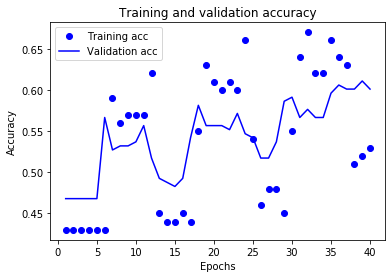

In [10]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()